# Libs

In [2]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Loading the Vectors

In [3]:
#To load the pre-trained vectors, we must first create a dictionary that will 
#hold the mappings between words, and the embedding vectors of those words.
embeddings_dict = {}
#we need to loop through each line in the file, and split the line by every space, 
#into each of its components.
#Finally, we can update our dictionary with the new word and its corresponding vector.
with open("glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

# Finding Similar Vectors

In [4]:
#find the most similar words to a given word
#sorted takes an iterable as input and sorts it using a key
#the iterable that we are passing in is all possible words that we want to sort
#get a list of such words by calling embeddings_dict.keys().
#Python would sort the list alphabetically, 
#we must specify a key to sort the list the way we want it sorted.
#the key will be a lambda function that takes a word as input and returns the distance 
#between that word’s embedding and the embedding we gave the function
# We will be using euclidean distance to measure how far apart the two embeddings are.
#scipy has a function for measuring euclidean distance under its module spatial

def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [5]:
#if we want to shorten it we can use a slice at the end, for the closest, 
#let’s say five words.
find_closest_embeddings(embeddings_dict["wall"])[:5]

['wall', 'falling', 'slide', 'floor', 'pointing']

In [6]:
print(find_closest_embeddings(embeddings_dict["geometric"])[1:6])

['geometrical', 'shapes', 'abstract', 'geometry', 'three-dimensional']


# Math with Words

In [7]:
#e can add and subtract two words together, just like numbers. i.e., twig-branch+hand ≈ finger
print(find_closest_embeddings(
    embeddings_dict["russia"] - embeddings_dict["berlin"])[:5])

['venezuela', 'adversaries', 'kirghizstan', 'favours', 'kazakhstan']


# Visualizing the Vectors

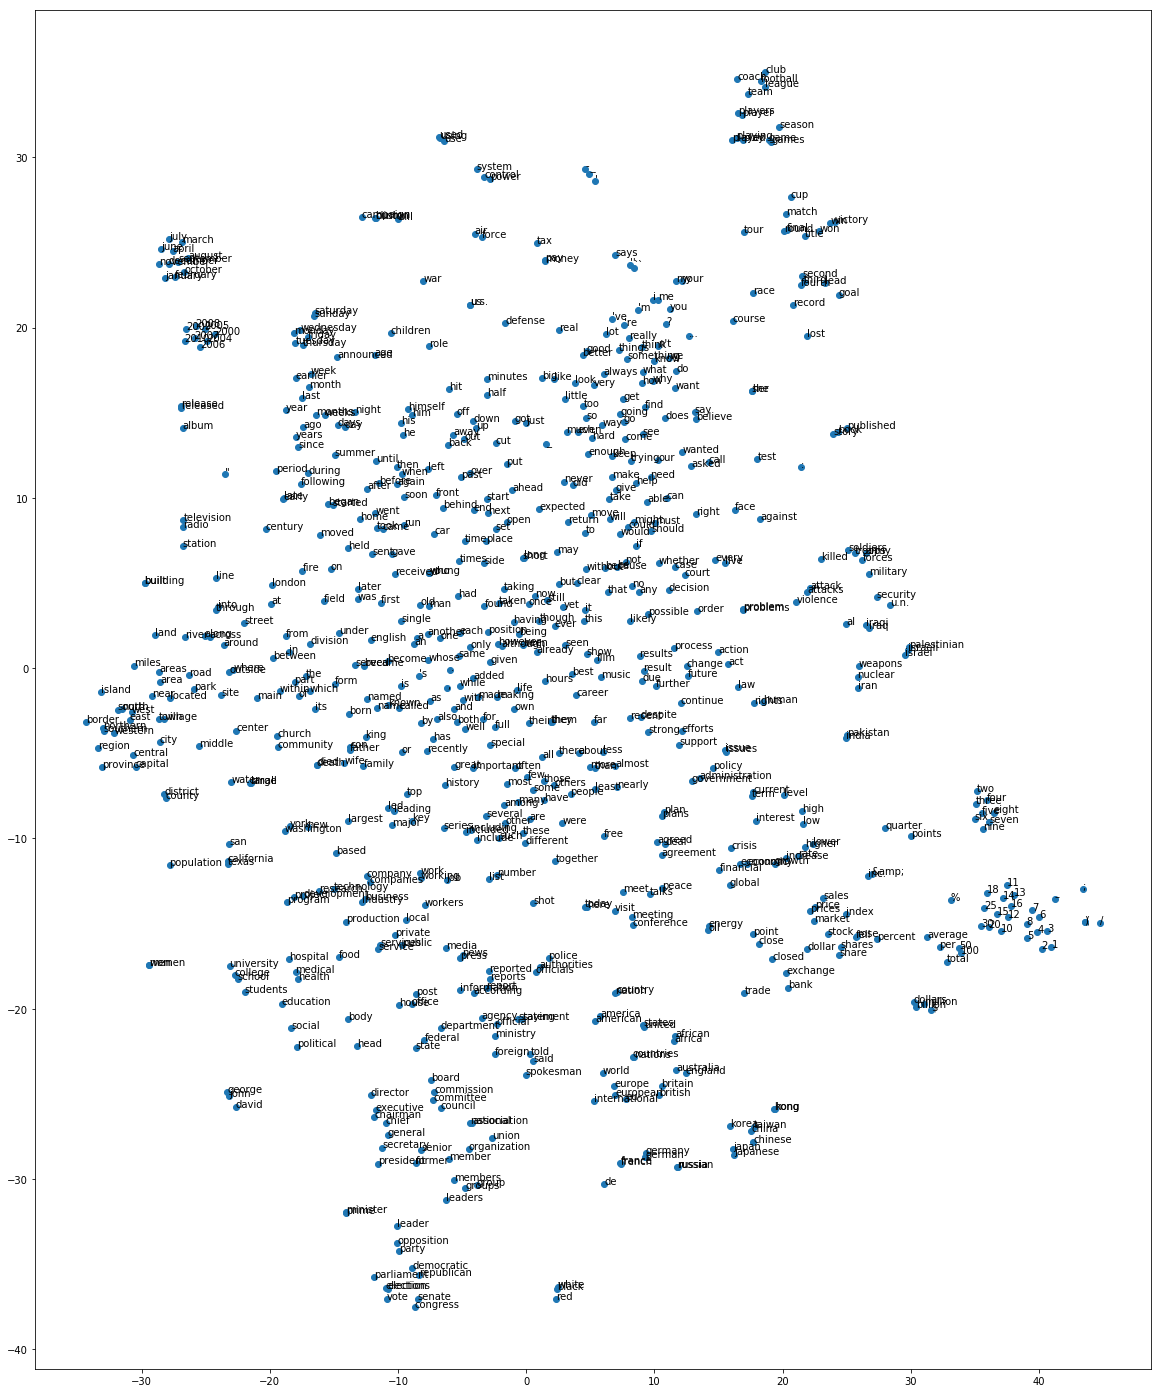

In [15]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:750])
fig = plt.figure(figsize=(15,15))
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

In [9]:
#init tSNE
tsne = TSNE(n_components=2, random_state=0)
#takes all the keys of embeddings_dict and converts it to a list.
words = list(embeddings_dict.keys())
# uses list comprehension to obtain the value in embeddings_dict that corresponds to 
#each word we chose, and put that into list form.
vector = [embeddings_dict[word] for word in words]

In [10]:
#We can also manually specify words so that it will only plot individual words. 
#i.e., words = [“sister”, “brother”, “man”, “woman”, “uncle”, “aunt”]
#After getting all the words we want to use and their corresponding vectors, 
#we now need to fit the t-SNE class on our vectors.

#fit the t-SNE class on our vectors
Y = tsne.fit_transform(vector[:750])

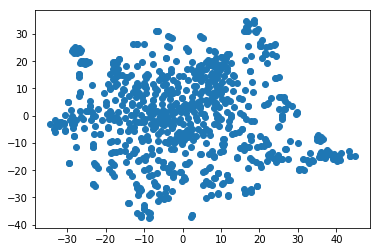

In [11]:
#After the t-SNE class finishes fitting to the vectors, 
#we can use a matplotlib scatter plot to plot the data:
plt.scatter(Y[:, 0], Y[:, 1])